In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
cv_results = cross_validate(
    tree, 
    data, 
    target, 
    cv=10,
    return_train_score=True,
    return_estimator=True,
)
scores = cv_results["test_score"]

print(
    "R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.627 ± 0.100


In [3]:
test_score_tree = cv_results["test_score"]
test_score_tree

array([0.59650558, 0.66957713, 0.7193112 , 0.8184209 , 0.6242818 ,
       0.72483157, 0.53090702, 0.51655398, 0.58421785, 0.49038086])

In [4]:
from sklearn.ensemble import RandomForestRegressor

ensamble = RandomForestRegressor(random_state=0)
cv_results = cross_validate(
    ensamble, 
    data, 
    target, 
    cv=10,
    return_train_score=True,
    return_estimator=True,
)
scores = cv_results["test_score"]


print(
    "R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.804 ± 0.045


In [5]:
test_score_ensamble = cv_results["test_score"]
test_score_ensamble

array([0.78812533, 0.77436104, 0.88871396, 0.84661427, 0.78043644,
       0.85771461, 0.79185662, 0.73543268, 0.76485281, 0.8077531 ])

A model using RandomForest is better than a model using Tree for 10 CV iterations out of 10.


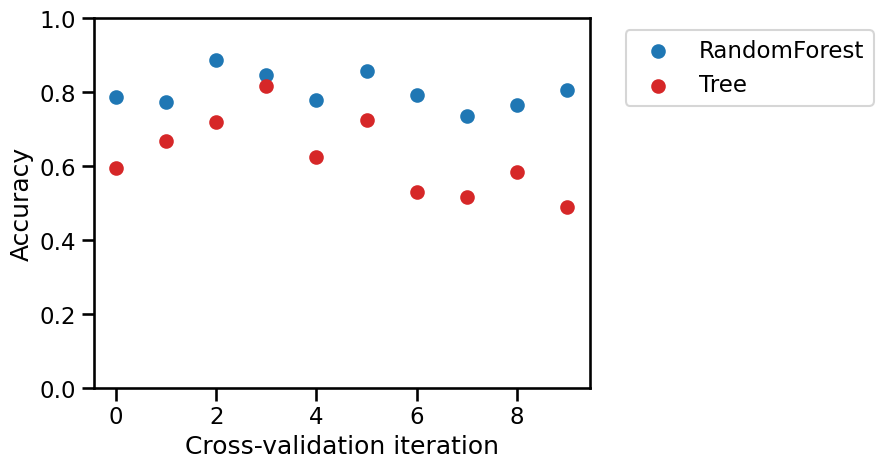

In [6]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.arange(len(test_score_ensamble))
plt.scatter(
    indices, test_score_ensamble, color="tab:blue", label="RandomForest"
)
plt.scatter(
    indices,
    test_score_tree,
    color="tab:red",
    label="Tree",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using RandomForest is better than a"
    " model using Tree for"
    f" {sum(test_score_ensamble > test_score_tree)} CV iterations out of 10."
)

In [7]:
from sklearn.ensemble import RandomForestRegressor

ensamble = RandomForestRegressor(n_estimators=5)
cv_results = cross_validate(
    ensamble, 
    data, 
    target, 
    cv=10,
    return_train_score=True,
    return_estimator=True,
)
scores = cv_results["test_score"]


print(
    "R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.781 ± 0.051


In [8]:
test_score_5 = cv_results["test_score"]
test_score_5

array([0.77658127, 0.68341332, 0.8755419 , 0.81663163, 0.72150741,
       0.81428529, 0.78878494, 0.7846156 , 0.75060576, 0.79979237])

In [9]:
from sklearn.ensemble import RandomForestRegressor

ensamble = RandomForestRegressor(n_estimators=100)
cv_results = cross_validate(
    ensamble, 
    data, 
    target, 
    cv=10,
    return_train_score=True,
    return_estimator=True,
)
scores = cv_results["test_score"]


print(
    "R2 score obtained by cross-validation: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

R2 score obtained by cross-validation: 0.805 ± 0.047


In [10]:
test_score_100 = cv_results["test_score"]
test_score_100

array([0.79706254, 0.79000591, 0.88719703, 0.84666868, 0.78555037,
       0.86682004, 0.77551823, 0.72254085, 0.7689114 , 0.80828051])

A model using RandomForest_5 is better than a model using RandomForest_100 for 2 CV iterations out of 10.


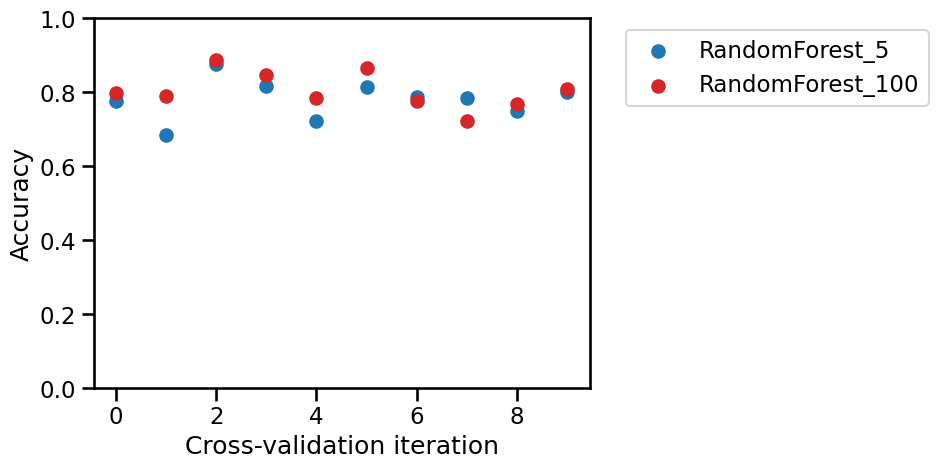

In [11]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.arange(len(test_score_5))
plt.scatter(
    indices, test_score_5, color="tab:blue", label="RandomForest_5"
)
plt.scatter(
    indices,
    test_score_100,
    color="tab:red",
    label="RandomForest_100",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using RandomForest_5 is better than a"
    " model using RandomForest_100 for"
    f" {sum(test_score_5 > test_score_100)} CV iterations out of 10."
)

In [12]:
import numpy as np
n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

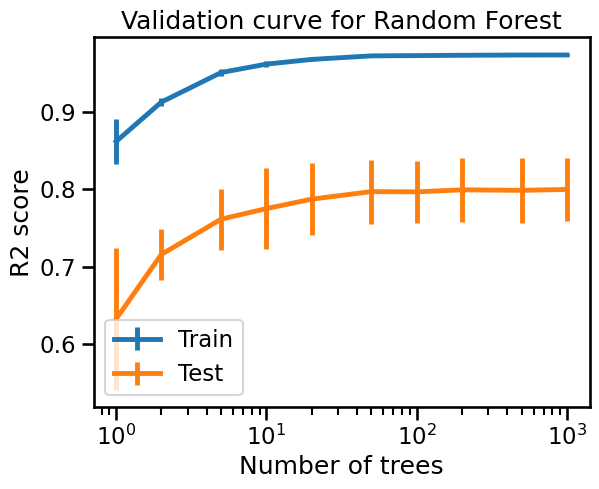

In [27]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

disp = ValidationCurveDisplay.from_estimator(
    RandomForestRegressor(random_state=0),
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    scoring="r2",  
    score_name="R2 score",
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees",
    title="Validation curve for Random Forest",
)


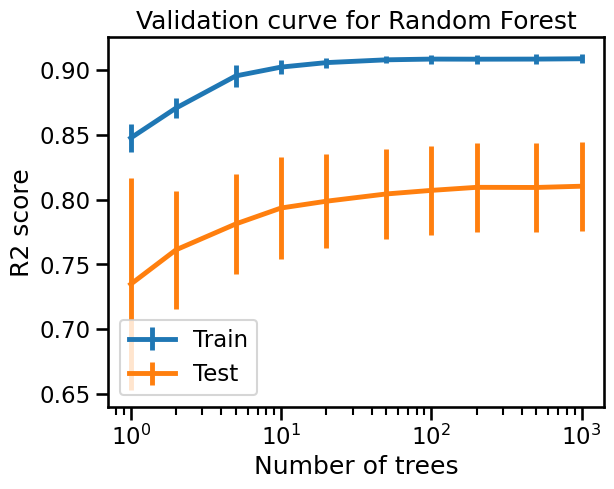

In [26]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

disp = ValidationCurveDisplay.from_estimator(
    RandomForestRegressor(random_state=0, max_depth=5),
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    scoring="r2",  
    score_name="R2 score",
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees",
    title="Validation curve for Random Forest",
)


In [28]:
max_iters = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

In [29]:
from sklearn.ensemble import HistGradientBoostingRegressor

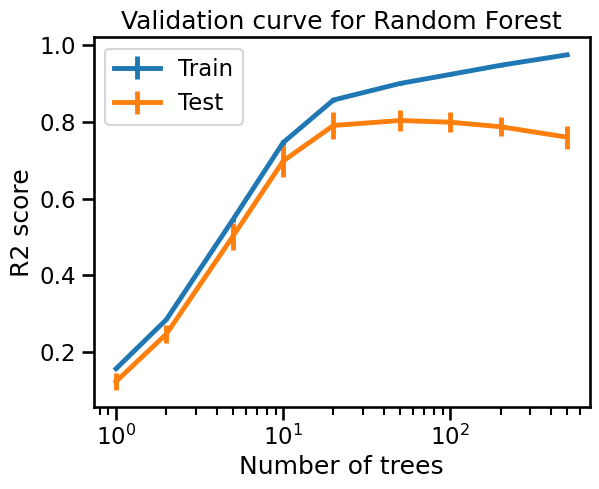

In [32]:
disp = ValidationCurveDisplay.from_estimator(
    HistGradientBoostingRegressor(),
    data,
    target,
    param_name="max_iter",
    param_range=max_iters,
    scoring="r2",  
    score_name="R2 score",
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees",
    title="Validation curve for Random Forest",
)